<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/Customer-Churn-Prediction-using-FNN/blob/main/Customer%20Churn%20Prediction%20using%20FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

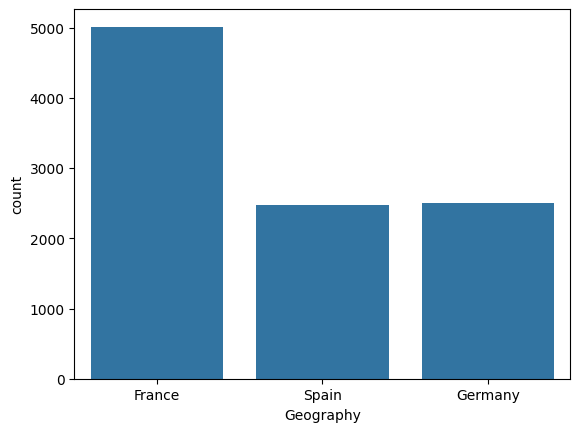

In [13]:
sns.countplot(x=df['Geography'])

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

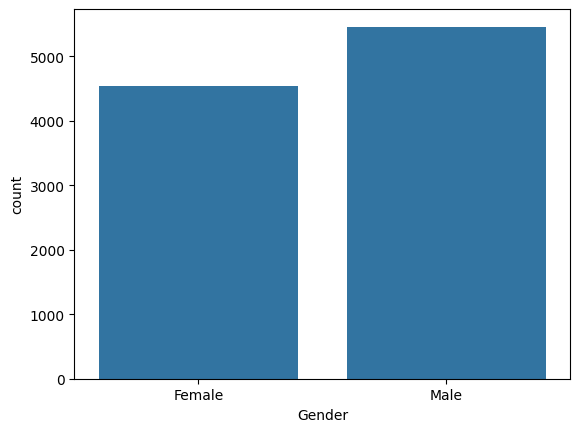

In [16]:
sns.countplot(x=df['Gender'])

In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

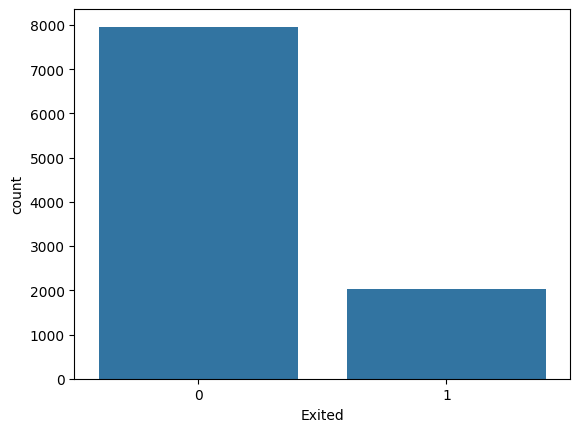

In [18]:
sns.countplot(x=df['Exited'])

In [19]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [22]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [23]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train_scaled,y_train)

<Axes: xlabel='Exited', ylabel='count'>

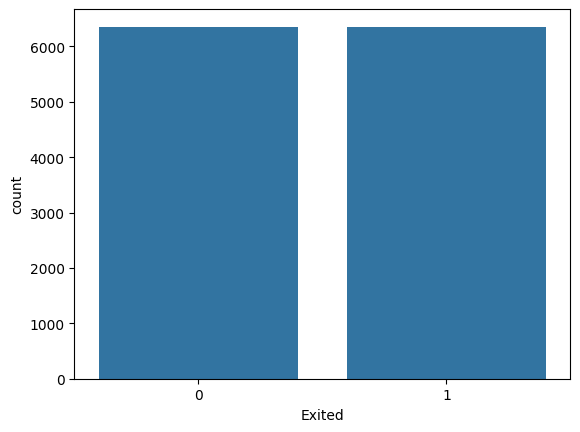

In [27]:
sns.countplot(x=y_resampled)

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 32)                384       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1605 (6.27 KB)
Trainable params: 1605 (6.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
history=model.fit(x_train_scaled,y_train,batch_size=32,epochs=300,validation_split=0.20)

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5477 - accuracy: 0.7906 - val_loss: 0.5164 - val_accuracy: 0.7987
Epoch 2/300
200/200 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7934 - val_loss: 0.4901 - val_accuracy: 0.7987
Epoch 3/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7942 - val_loss: 0.4721 - val_accuracy: 0.7994
Epoch 4/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7936 - val_loss: 0.4593 - val_accuracy: 0.8000
Epoch 5/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7956 - val_loss: 0.4501 - val_accuracy: 0.8019
Epoch 6/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7944 - val_loss: 0.4433 - val_accuracy: 0.8031
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7955 - val_loss: 0.4381 - val_accuracy: 0.8056

In [33]:
model.layers[0].get_weights()

[array([[-0.22470795, -0.01192076, -0.23640187,  0.00478087,  0.04848663,
         -0.21106917,  0.18116659,  0.20808405,  0.02329037, -0.06429952,
         -0.11686234],
        [-0.6192016 ,  0.18293113, -0.15734346, -0.08468312, -0.46608523,
         -0.32751834,  0.52037185, -0.02753958,  0.7239353 ,  1.062757  ,
          0.9676954 ],
        [-0.18650322, -0.05997445, -0.07741526,  0.06731205, -0.24798593,
          0.06511677, -0.1826076 , -0.14001392, -0.19813998,  0.2617302 ,
         -0.38392535],
        [ 0.25560063,  0.36903664,  0.6320835 ,  0.34816846,  0.19955054,
         -0.49286845,  0.2034375 , -0.19152206, -0.26371473, -0.19968037,
          0.12359037],
        [ 0.25933966,  1.0370809 , -0.25987917,  0.02631475,  0.22873296,
          0.83145833,  0.16199568,  0.922708  , -0.1991494 ,  0.5528026 ,
         -0.08120716],
        [ 0.17588067, -0.28705785,  0.3722727 ,  0.27330944, -0.48464566,
         -0.4924515 , -0.3441832 ,  0.08493503, -0.48581257, -0.4407538

In [34]:
model.layers[1].get_weights()

[array([[ 1.43461190e-02,  2.64110237e-01, -2.58647710e-01,
         -2.05718771e-01,  1.89493880e-01, -9.66817737e-02,
          1.91589966e-01,  4.47486788e-01, -4.93437313e-02,
          1.93711802e-01,  3.90795648e-01,  1.00656822e-01,
          3.95292431e-01, -4.13709804e-02, -2.13644937e-01,
         -1.53885603e-01,  1.83279961e-01,  1.77667022e-01,
         -6.47069588e-02, -5.76453388e-01, -2.58082271e-01,
          1.57250568e-01,  3.30974102e-01,  2.95422792e-01,
          2.68290550e-01,  2.25727230e-01,  3.02692771e-01,
          3.00992668e-01, -3.21763784e-01,  2.51727402e-01,
         -1.35236248e-01,  3.94930065e-01],
        [ 9.33706462e-02, -2.26503223e-01,  1.09246701e-01,
          3.23461115e-01,  4.61176544e-01,  7.72254109e-01,
          3.20861995e-01,  1.62790224e-01,  4.54952806e-01,
         -2.34883770e-01,  3.18360329e-02, -2.30027616e-01,
          5.28007030e-01,  2.07244903e-02,  6.20986998e-01,
         -3.87763814e-03,  1.99775472e-01,  2.18022406e-

In [35]:
model.layers[2].get_weights()

[array([[-0.07824641,  0.23589648, -0.13928318, ...,  0.13707268,
          0.18678565,  0.15195471],
        [-0.28419855, -0.1973137 ,  0.13023895, ..., -0.01942123,
          0.21304351,  0.15560225],
        [ 0.2069122 , -0.04140124, -0.25132793, ...,  0.3497361 ,
          0.14046891, -0.29811567],
        ...,
        [ 0.16544007, -0.03979516,  0.40963003, ...,  0.08611237,
         -0.3201803 , -0.24442422],
        [-0.08348047,  0.14918225, -0.05309868, ..., -0.15811026,
         -0.1216151 ,  0.15820491],
        [ 0.22359037,  0.13855563, -0.0589635 , ...,  0.19331612,
         -0.28985426, -0.26319438]], dtype=float32),
 array([-0.1310833 , -0.02414037,  0.0537733 , -0.07759611, -0.0300296 ,
        -0.07703483,  0.04194012, -0.00122797, -0.05766361,  0.19417578,
         0.00171799,  0.05177751, -0.26430583,  0.08379389,  0.08695976,
        -0.01795682, -0.00169941,  0.08533078, -0.06927299, -0.0237474 ,
        -0.12907195, -0.08143879, -0.11123046, -0.00329322, -0.017

In [36]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [37]:
y_pred=np.where(y_log>0.5,1,0)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.854

In [39]:
history.history

{'loss': [0.5477416515350342,
  0.5033804178237915,
  0.4837724566459656,
  0.47039005160331726,
  0.46067437529563904,
  0.45370563864707947,
  0.44833922386169434,
  0.4441654682159424,
  0.440669983625412,
  0.4377264082431793,
  0.43499472737312317,
  0.4330265522003174,
  0.43087777495384216,
  0.4292316138744354,
  0.42729514837265015,
  0.42569008469581604,
  0.42388516664505005,
  0.422076940536499,
  0.42054393887519836,
  0.41869738698005676,
  0.4169757068157196,
  0.41487643122673035,
  0.41302430629730225,
  0.41093435883522034,
  0.4084118902683258,
  0.4059349298477173,
  0.40323683619499207,
  0.4006105363368988,
  0.3973229229450226,
  0.39407405257225037,
  0.3903365433216095,
  0.38604530692100525,
  0.3820649981498718,
  0.3777220547199249,
  0.3733713626861572,
  0.36945897340774536,
  0.36528709530830383,
  0.36176031827926636,
  0.3586791753768921,
  0.3558688461780548,
  0.3535034656524658,
  0.3514299690723419,
  0.34955477714538574,
  0.3482753038406372,
  0.3

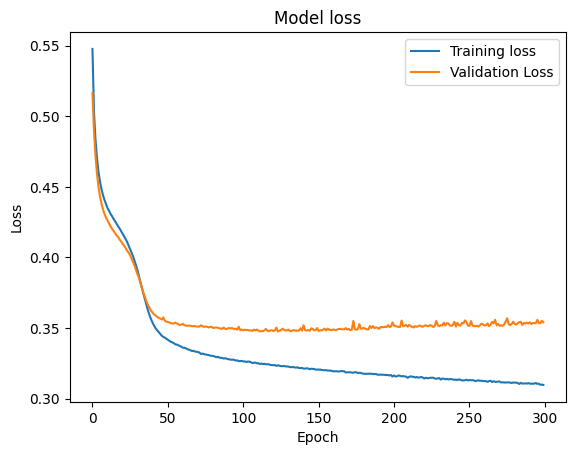

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation Loss'])
plt.show()

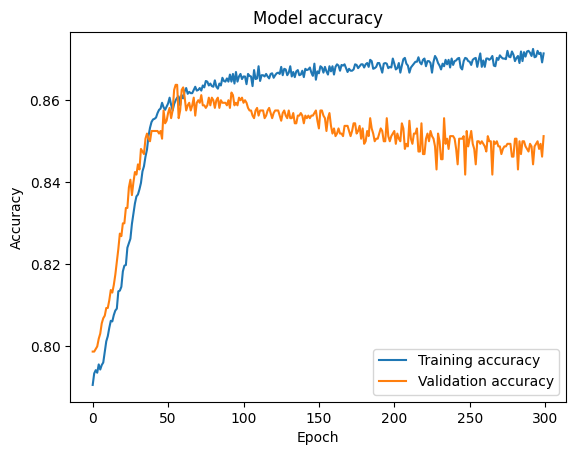

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()